In [ ]:
print ('WELCOME TO MY PROJECT Future Navigation Demand Trends: Accurate Ride Request Forecasting Optimization Via Machine Learning')

WELCOME TO MY PROJECT Future Navigation Demand Trends: Accurate Ride Request Forecasting Optimization Via Machine Learning


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


IF WE ARE WORKING WITH GOOGLE COLAB ENVIRONMENT , WE SHOULD ACCESS OUR PRE-PROCESSED DATASET BY CONNECTING OUR GOOGLE DRIVE.


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
train_df=pd.read_csv(r'/content/drive/MyDrive/proo/train.csv')
test_df=pd.read_csv(r'/content/drive/MyDrive/proo/test.csv')
sampleSubmission_df=pd.read_csv(r'/content/drive/MyDrive/proo/sampleSubmission.csv')

In [ ]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
print(train_df.shape)
print(test_df.shape)

(10886, 12)
(6493, 9)


In [ ]:
test_df.info(11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [ ]:
train_df.info(11)

<class 'pandas.core.frame.DataFrame'>
Index: 10885 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10885 non-null  object 
 1   season      10885 non-null  int64  
 2   holiday     10885 non-null  int64  
 3   workingday  10885 non-null  int64  
 4   weather     10885 non-null  int64  
 5   temp        10885 non-null  float64
 6   atemp       10885 non-null  float64
 7   humidity    10885 non-null  int64  
 8   windspeed   10885 non-null  float64
 9   casual      10885 non-null  int64  
 10  registered  10885 non-null  int64  
 11  count       10885 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1.1+ MB


In [ ]:
train_df['date'] = train_df['datetime'].apply(lambda x: x.split()[0])

In [ ]:
train_df['year'] = train_df['datetime'].apply(lambda x: x.split()[0].split('-')[0])
train_df['month'] = train_df['datetime'].apply(lambda x: x.split()[0].split('-')[1])
train_df['day'] = train_df['datetime'].apply(lambda x: x.split()[0].split('-')[2])
train_df['hour'] = train_df['datetime'].apply(lambda x: x.split()[1].split(':')[0])
train_df['minute'] = train_df['datetime'].apply(lambda x: x.split()[1].split(':')[1])
train_df['second'] = train_df['datetime'].apply(lambda x: x.split()[1].split(':')[2])

In [ ]:
from datetime import datetime
import calendar

In [ ]:
train_df['weekday'] = train_df['date'].apply(lambda dateString: calendar.day_name[datetime.strptime(dateString, "%Y-%m-%d").weekday()])

In [ ]:
train_df['season'] = train_df['season'].map({
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
})
train_df['weather'] = train_df['weather'].map({
    1: 'Clear',
    2: 'Mist, Few clouds',
    3: 'Light Snow, Rain, Thunderstorm',
    4: 'Heavy Rain, Thunderstorm, Snow, Fog'
})

In [ ]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


In [ ]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

<ipython-input-42-b227a8fd567f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['count'])


<Axes: xlabel='count', ylabel='Density'>

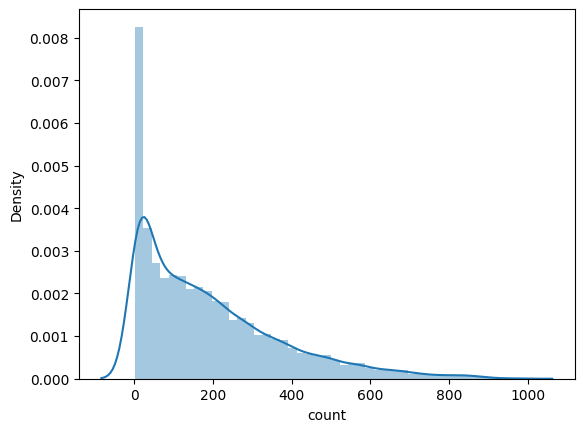

In [ ]:
sns.distplot(train_df['count'])

<ipython-input-43-6939b6d69a8d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(train_df['count']))


<Axes: xlabel='count', ylabel='Density'>

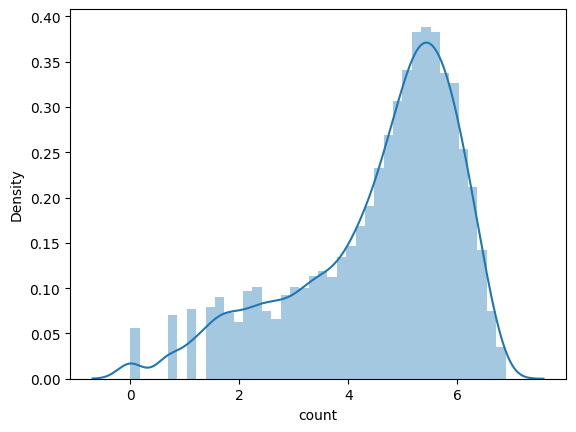

In [ ]:
sns.distplot(np.log(train_df['count']))

<Axes: xlabel='second', ylabel='count'>

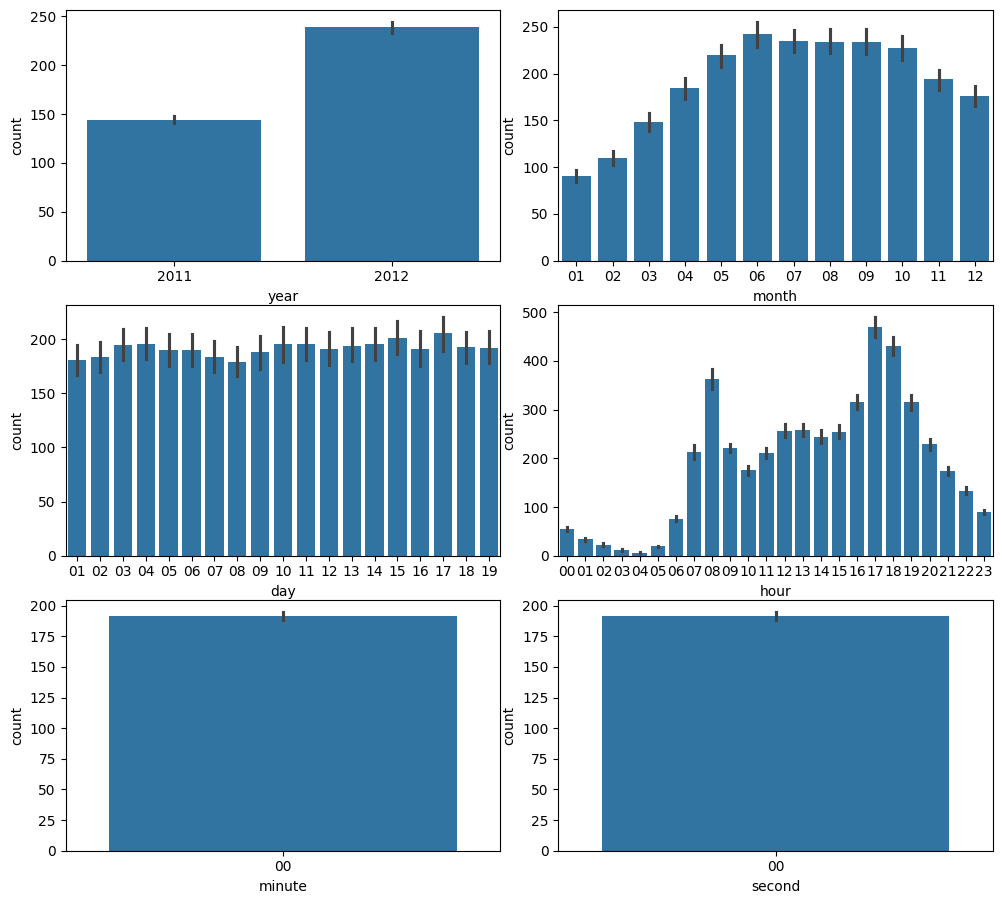

In [ ]:
figure, axes = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(10, 9)
plt.tight_layout()

sns.barplot(x='year', y='count', data=train_df, ax=axes[0, 0])
sns.barplot(x='month', y='count', data=train_df, ax=axes[0, 1])
sns.barplot(x='day', y='count', data=train_df, ax=axes[1, 0])
sns.barplot(x='hour', y='count', data=train_df, ax=axes[1, 1])
sns.barplot(x='minute', y='count', data=train_df, ax=axes[2, 0])
sns.barplot(x='second', y='count', data=train_df, ax=axes[2, 1])

<Axes: xlabel='workingday', ylabel='count'>

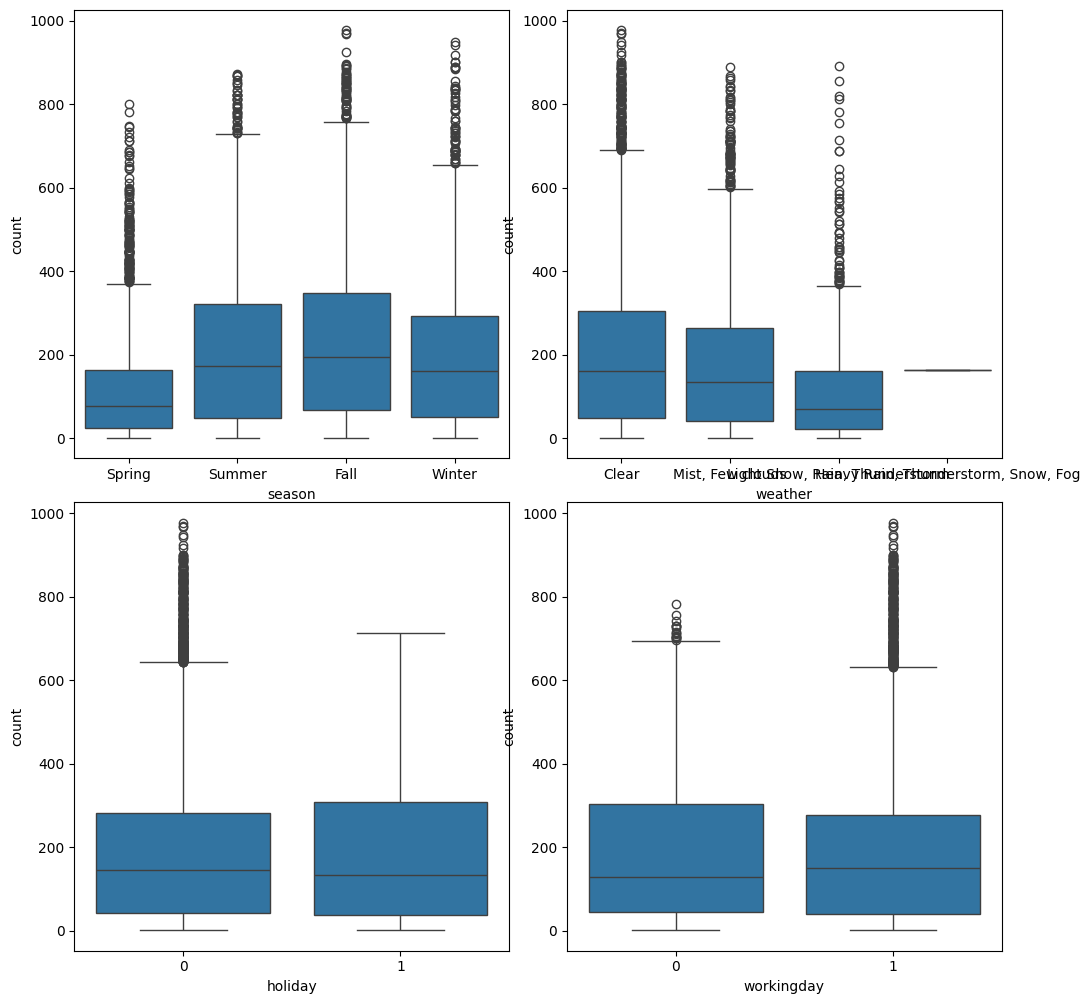

In [ ]:
figure, axes = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(10, 10)
plt.tight_layout()

sns.boxplot(x='season', y='count', data=train_df, ax=axes[0, 0])
sns.boxplot(x='weather', y='count', data=train_df, ax=axes[0, 1])
sns.boxplot(x='holiday', y='count', data=train_df, ax=axes[1, 0])
sns.boxplot(x='workingday', y='count', data=train_df, ax=axes[1, 1])

<Axes: xlabel='hour', ylabel='count'>

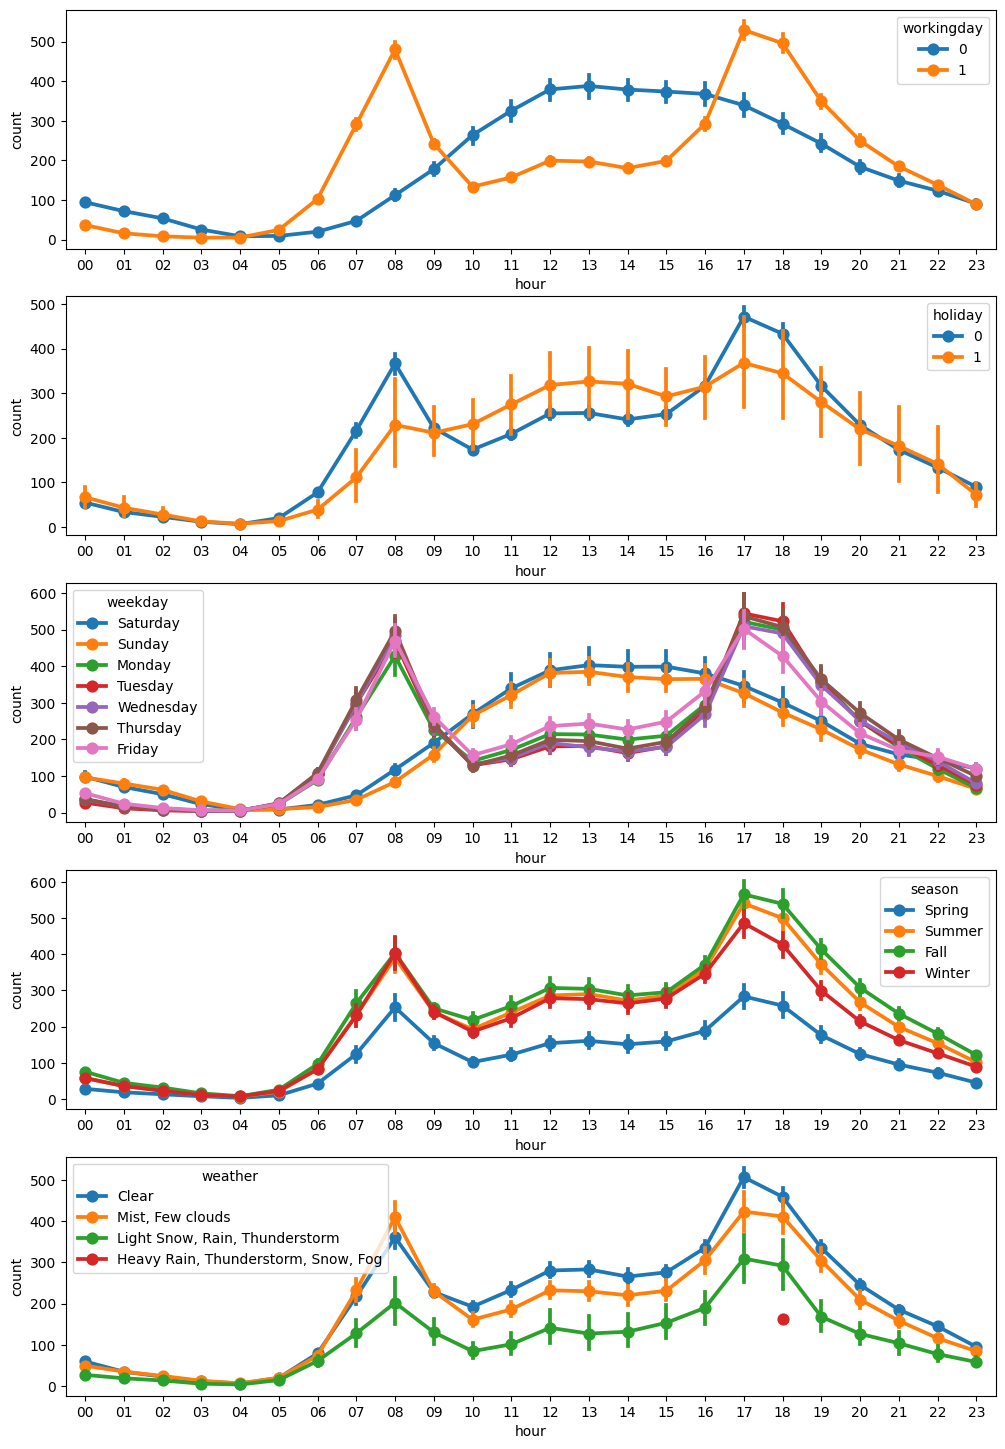

In [ ]:
figure, axes = plt.subplots(nrows=5)
figure.set_size_inches(12, 18)

sns.pointplot(x='hour', y='count', data=train_df, hue='workingday', ax=axes[0])
sns.pointplot(x='hour', y='count', data=train_df, hue='holiday', ax=axes[1])
sns.pointplot(x='hour', y='count', data=train_df, hue='weekday', ax=axes[2])
sns.pointplot(x='hour', y='count', data=train_df, hue='season', ax=axes[3])
sns.pointplot(x='hour', y='count', data=train_df, hue='weather', ax=axes[4])

<Axes: xlabel='humidity', ylabel='count'>

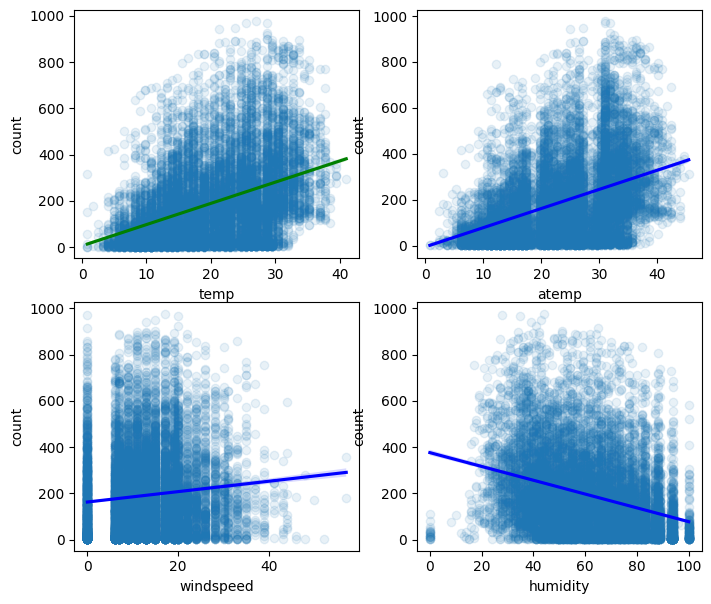

In [ ]:
figure, axes = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(7, 6)
plt.tight_layout()

sns.regplot(x='temp', y='count', data=train_df, ax=axes[0, 0], scatter_kws={'alpha': 0.1}, line_kws={'color': 'green'})
sns.regplot(x='atemp', y='count', data=train_df, ax=axes[0, 1], scatter_kws={'alpha': 0.1}, line_kws={'color': 'blue'})
sns.regplot(x='windspeed', y='count', data=train_df, ax=axes[1, 0], scatter_kws={'alpha': 0.1}, line_kws={'color': 'blue'})
sns.regplot(x='humidity', y='count', data=train_df, ax=axes[1, 1], scatter_kws={'alpha': 0.1}, line_kws={'color': 'blue'})

In [ ]:
corr = train_df[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()

<Axes: >

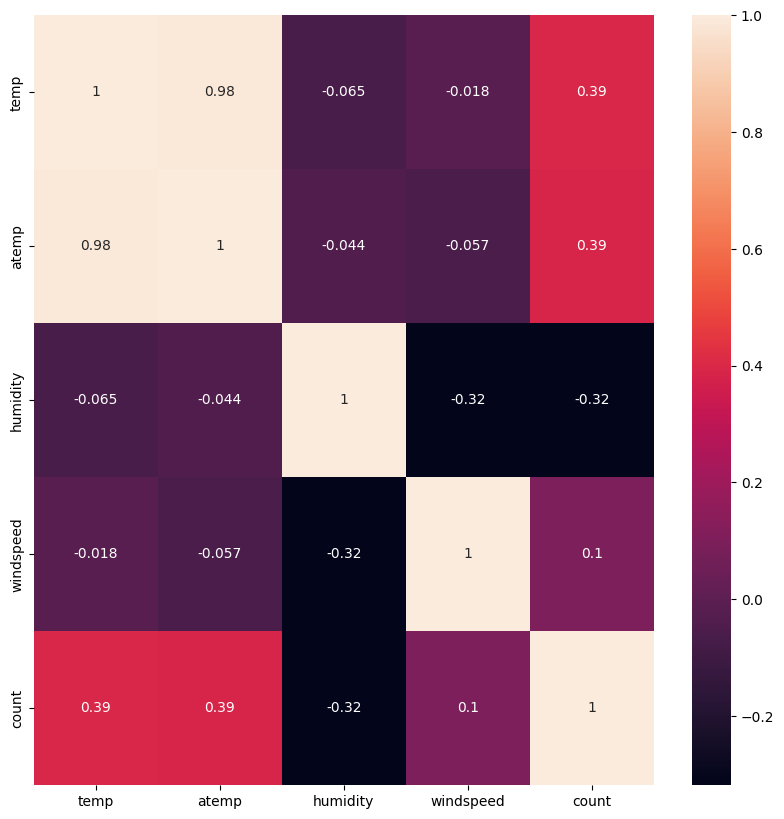

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
sns.heatmap(corr, annot=True)

In [ ]:
train_df=pd.read_csv(r'/content/drive/MyDrive/proo/train.csv')
test_df=pd.read_csv(r'/content/drive/MyDrive/proo/test.csv')
sampleSubmission_df=pd.read_csv(r'/content/drive/MyDrive/proo/sampleSubmission.csv')

In [ ]:
train_df = train_df[train_df['weather'] != 4]

In [ ]:
all_df = pd.concat([train_df, test_df], ignore_index=True)
all_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17373,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17374,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17375,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
17376,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


In [ ]:
all_df['date'] = all_df['datetime'].apply(lambda x: x.split()[0])

all_df['year'] = all_df['datetime'].apply(lambda x: x.split()[0].split('-')[0])
all_df['month'] = all_df['datetime'].apply(lambda x: x.split()[0].split('-')[1])
all_df['hour'] = all_df['datetime'].apply(lambda x: x.split()[1].split(':')[0])

In [ ]:
drop_features = ['casual', 'registered', 'datetime', 'date', 'windspeed', 'month']

all_df = all_df.drop(drop_features, axis=1)

In [ ]:
all_df

,season,holiday,workingday,weather,temp,atemp,humidity,count,year,hour
0,1,0,0,1,9.84,14.395,81,16.0,2011,00
1,1,0,0,1,9.02,13.635,80,40.0,2011,01
2,1,0,0,1,9.02,13.635,80,32.0,2011,02
3,1,0,0,1,9.84,14.395,75,13.0,2011,03
4,1,0,0,1,9.84,14.395,75,1.0,2011,04
...,...,...,...,...,...,...,...,...,...,...
17373,1,0,1,2,10.66,12.880,60,NaN,2012,19
17374,1,0,1,2,10.66,12.880,60,NaN,2012,20
17375,1,0,1,1,10.66,12.880,60,NaN,2012,21
17376,1,0,1,1,10.66,13.635,56,NaN,2012,22


In [ ]:
X_train = all_df[~pd.isnull(all_df['count'])]
X_test = all_df[pd.isnull(all_df['count'])]

# remove target value
X_train = X_train.drop(['count'], axis=1)
X_test = X_test.drop(['count'], axis=1)

y_train = train_df['count']

In [ ]:
X_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,year,hour
0,1,0,0,1,9.84,14.395,81,2011,00
1,1,0,0,1,9.02,13.635,80,2011,01
2,1,0,0,1,9.02,13.635,80,2011,02
3,1,0,0,1,9.84,14.395,75,2011,03
4,1,0,0,1,9.84,14.395,75,2011,04


In [ ]:
def rmsle(y_true, y_pred, convertExp=True):
    if convertExp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)

    log_true = np.nan_to_num(np.log(y_true+1))
    log_pred = np.nan_to_num(np.log(y_pred+1))

    output = np.sqrt(np.mean((log_true - log_pred)**2))
    return output

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

In [ ]:
rf_params = {'random_state': [42], 'n_estimators': [100, 120, 140]}

rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)

In [ ]:
gridsearch_random_forest_model = GridSearchCV(estimator=model,
                                     param_grid=rf_params,
                                     scoring=rmsle_scorer,
                                     cv=5)

In [ ]:
log_y_train = np.log(y_train)
gridsearch_random_forest_model.fit(X_train, log_y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [100, 120, 140], 'random_state': [42]},
             scoring=make_scorer(rmsle, greater_is_better=False))

In [ ]:
print(f'Optimized hyperparameter: {gridsearch_random_forest_model.best_params_}')

Optimized hyperparameter: {'n_estimators': 140, 'random_state': 42}


In [ ]:
preds = gridsearch_random_forest_model.best_estimator_.predict(X_train)

In [ ]:
print(f'RMSLE: {rmsle(log_y_train, preds, True):.4f}')

RMSLE: 0.1306


In [ ]:
submission_preds = gridsearch_random_forest_model.best_estimator_.predict(X_test)

Text(0.5, 1.0, 'Predicted Test Data Distribution')

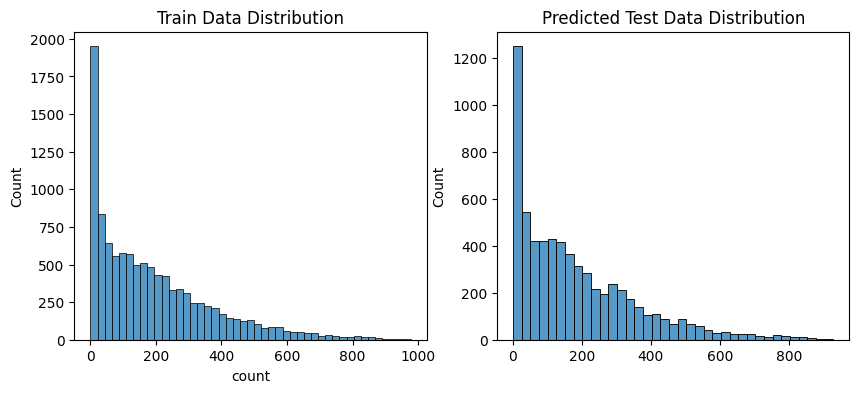

In [ ]:
figure, axes = plt.subplots(ncols=2)
figure.set_size_inches(10, 4)

sns.histplot(y_train, ax=axes[0])
axes[0].set_title('Train Data Distribution')
sns.histplot(np.exp(submission_preds), ax=axes[1])
axes[1].set_title('Predicted Test Data Distribution')

In [ ]:
sampleSubmission_df['count'] = np.exp(submission_preds)
sampleSubmission_df.to_csv('submission.csv', index=False)